
# Laboratório de Redes de Computadores: Implementação e Análise do CRC

## Parte 1: Fundamentação Matemática do CRC

Nesta seção, explicamos os conceitos fundamentais que sustentam o algoritmo CRC. O CRC (Cyclic Redundancy Check) trata a mensagem como um polinômio binário M(x) e a divide por um polinômio gerador G(x). O resto dessa divisão é o CRC.

### Fórmulas:
- Geração do CRC: \( CRC = (M(x) \cdot 2^r) \mod G(x) \)
- Verificação: Se \( T(x) \mod G(x) = 0 \), a mensagem é considerada íntegra.

---

## Parte 2: Implementação Manual do CRC

### Funções Auxiliares


In [1]:
%pip install crc
%pip install matplotlib

  Using cached crc-7.1.0-py3-none-any.whl.metadata (6.0 kB)
Using cached crc-7.1.0-py3-none-any.whl (8.8 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl (2.2 MB)
U

In [2]:

def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        resultado += '0' if a[i] == b[i] else '1'

    return resultado

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    mensagem_aumentada = dados_bits + '0' * (len(gerador_bits) - 1)
    count = len(gerador_bits)

    output = mensagem_aumentada[:len(gerador_bits)]
    while count < len(mensagem_aumentada):
        if output[0] == '0':
            output = output[1:] + mensagem_aumentada[count]
        else:
            output = xor_bits(output, gerador_bits)[1:] + mensagem_aumentada[count]
            
        count += 1
        
    if output[0] == '1':
        output = xor_bits(output, gerador_bits)[1:]
    else:
        output = output[1:]

    return output


In [3]:

# Teste com exemplo do slide
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")


Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010



## Parte 3: Análise Comparativa de Desempenho

Vamos comparar o desempenho da implementação manual do CRC com a versão otimizada da biblioteca `crc`. A comparação será feita com base no tempo de execução e no pico de memória consumido para mensagens de tamanhos variados.


Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...


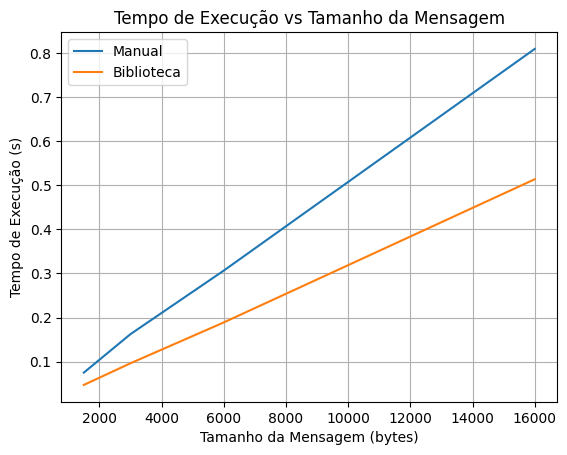

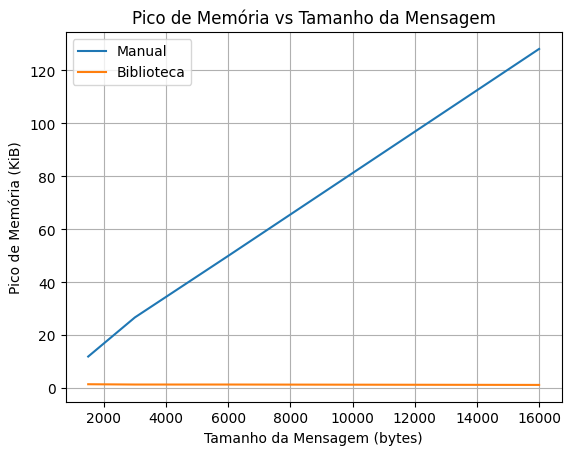

In [4]:

import time
import tracemalloc
import os
from crc import Calculator, Crc16
import matplotlib.pyplot as plt

# Gerador usado pela implementação da biblioteca
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000, 6000, 16000]
resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    # Manual
    tracemalloc.start()
    start_time = time.perf_counter()
    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101")
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    tempo_manual = end_time - start_time

    # Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    tempo_lib = end_time - start_time

    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024,
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024
    })

# Plotagem
tamanhos = [r["tamanho"] for r in resultados]
tempos_manual = [r["tempo_manual"] for r in resultados]
tempos_lib = [r["tempo_lib"] for r in resultados]
mem_manual = [r["mem_pico_manual"] for r in resultados]
mem_lib = [r["mem_pico_lib"] for r in resultados]

plt.figure()
plt.plot(tamanhos, tempos_manual, label="Manual")
plt.plot(tamanhos, tempos_lib, label="Biblioteca")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Tempo de Execução vs Tamanho da Mensagem")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(tamanhos, mem_manual, label="Manual")
plt.plot(tamanhos, mem_lib, label="Biblioteca")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Pico de Memória (KiB)")
plt.title("Pico de Memória vs Tamanho da Mensagem")
plt.legend()
plt.grid(True)
plt.show()



## Parte 4: Investigação dos Limites do CRC

Nesta etapa, utilizamos uma mensagem personalizada para verificar padrões de erro que podem passar despercebidos pelo algoritmo.

- **Mensagem base**: Everton Luciano Victor
- **MENSAGEM_BASE** (em binário ASCII): "01000101011101100110010101110010011101000110111101101110001000000100110001110101011000110110100101100001011011100110111100100000010101100110100101100011011101000110111101110010"
- **Gerador**: CRC-16/MODBUS → "11000000000000101"


In [5]:

import random

def introduzir_erro_de_rajada(bits: str, tamanho_rajada: int) -> (str, int, str):
    pos = random.randint(0, len(bits) - tamanho_rajada)
    erro = ['0'] * len(bits)
    for i in range(tamanho_rajada):
        erro[pos + i] = '1'
    erro_str = "".join(erro)
    bits_corrompidos = xor_bits(bits, erro_str)
    return bits_corrompidos, pos, erro_str

mensagem_base_ascii = "Hello World"
mensagem_base_bin = "".join(format(ord(c), '08b') for c in mensagem_base_ascii)
gerador = "11000000000000101"
crc_original = calcular_crc_manual(mensagem_base_bin, gerador)
quadro_original = mensagem_base_bin + crc_original

calculator_lib = Calculator(Crc16.MODBUS)
quadro_bytes = int(quadro_original, 2).to_bytes((len(quadro_original) + 7) // 8, byteorder='big')

print(f"MENSAGEM_BASE: {mensagem_base_ascii}")
print(f"CRC Calculado: {crc_original}")

# Testes
falhas = []
for i in range(10):
    quadro_corrompido, pos_erro, padrao_erro = introduzir_erro_de_rajada(quadro_original, tamanho_rajada=16)
    crc_manual = calcular_crc_manual(quadro_corrompido[:-len(gerador)+1], gerador)
    quadro_bytes_corrompido = int(quadro_corrompido, 2).to_bytes((len(quadro_corrompido) + 7) // 8, byteorder='big')
    crc_biblioteca = calculator_lib.checksum(quadro_bytes_corrompido)

    detectado_manual = crc_manual != "0" * (len(gerador) - 1)
    detectado_lib = crc_biblioteca != 0

    print(f"Teste {i+1}: Posição do erro = {pos_erro}")
    print(f"Erro detectado (Manual)? {detectado_manual}")
    print(f"Erro detectado (Biblioteca)? {detectado_lib}")
    print()

    if not detectado_manual or not detectado_lib:
        falhas.append({
            "teste": i+1,
            "erro_na_posicao": pos_erro,
            "detectado_manual": detectado_manual,
            "detectado_lib": detectado_lib,
            "padrao_erro": padrao_erro
        })

if falhas:
    print("Falhas Encontradas:")
    for falha in falhas:
        print(falha)
else:
    print("Todos os erros foram detectados pelas duas implementações.")


MENSAGEM_BASE: Hello World
CRC Calculado: 0111000011000011
Teste 1: Posição do erro = 74
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 2: Posição do erro = 49
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 3: Posição do erro = 27
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 4: Posição do erro = 78
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 5: Posição do erro = 72
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 6: Posição do erro = 73
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 7: Posição do erro = 75
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 8: Posição do erro = 48
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 9: Posição do erro = 43
Erro detectado (Manual)? True
Erro detectado (Biblioteca)? True

Teste 10: Posição do erro = 74
Erro detectado (Manual)? True
Erro detectado (Bibliotec

> link para o repositório: https://github.com/joaovgouveia/redes/tree/main/lab2